In [17]:
# import necessary modules 
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as px
import seaborn as sns
import matplotlib
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.svm import OneClassSVM 
LABELS = ["Normal", "Fraud"]
import os
%matplotlib inline


 

In [23]:
 
# load the data set
data = pd.read_csv('/content/drive/MyDrive/Pattern Lab/creditcard.csv')
  
# print info about columns in the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
# normalise the amount column
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))

 
# drop Time and Amount columns as they are not relevant for prediction purpose 
data = data.drop(['Time', 'Amount'], axis = 1)
  
# as you can see there are 492 fraud transactions.
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
X = data.loc[:,data.columns != 'Class']

y = data['Class']


print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


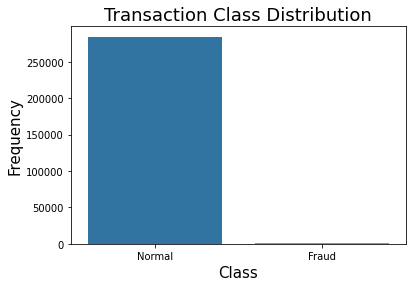

In [28]:
sns.countplot(data.Class)
LABELS = ["Normal", "Fraud"]
plt.title('Transaction Class Distribution',fontsize = 18)
plt.xticks(range(2), LABELS) 
plt.xlabel("Class" , fontsize =15)
plt.ylabel("Frequency",fontsize = 15)
plt.show();

In [29]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


In [30]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation=45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

	Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



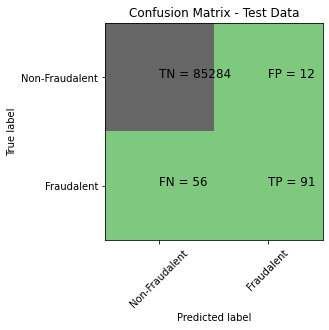

In [33]:
#Run Logistic Regression.

print("\tLogistic Regression")
LR = LogisticRegression()

#training 
LR.fit(X_train, y_train.ravel())

#find predicted vallues
LR_pred = LR.predict(X_test)
  
Accuracy_LR = accuracy_score(LR_pred, y_test)
Accuracy_Precision_LR = precision_score(LR_pred, y_test)
Accuracy_Recall_LR = recall_score(LR_pred, y_test)

# print classification report
print(classification_report(y_test, LR_pred))

Plot_confusion_matrix(y_test, LR_pred)

In [9]:
# print("\t SVM Model")

# svm=SVC()

# #training
# svm.fit(X_train, y_train)

# #find prediction values
# svm_pred=svm.predict(X_test)


# Accuracy_SVM = accuracy_score(svm_pred, y_test)
# Accuracy_Precision_SVM = precision_score(svm_pred, y_test)
# Accuracy_Recall_SVM = recall_score(svm_pred, y_test)


# # print classification report
# print(classification_report(y_test, svm_pred))

# Plot_confusion_matrix(y_test, svm_pred)

In [36]:
# Using SMOTE Algorithm
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


	Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



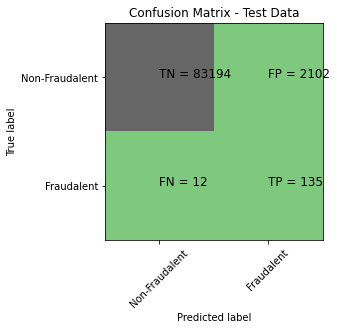

In [37]:
#Run Logistic Regression.

print("\tLogistic Regression")
LR = LogisticRegression()

#training 
LR.fit(X_train_res, y_train_res.ravel())

#find predicted vallues
LR_pred = LR.predict(X_test)
  
Accuracy_LR = accuracy_score(LR_pred, y_test)
Accuracy_Precision_LR = precision_score(LR_pred, y_test)
Accuracy_Recall_LR = recall_score(LR_pred, y_test)

# print classification report
print(classification_report(y_test, LR_pred))

Plot_confusion_matrix(y_test, LR_pred)

In [40]:
# Using RandomUnderSampler

print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply undersampler
from imblearn.under_sampling import RandomUnderSampler 
rs = RandomUnderSampler()
  
X_train_rs, y_train_rs = rs.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_rs.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_rs.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_rs == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_rs == 0)))

Before Undersampling, counts of label '1': 345
Before Undersampling, counts of label '0': 199019 

After Undersampling, the shape of train_X: (690, 29)
After Undersampling, the shape of train_y: (690,) 

After Undersampling, counts of label '1': 345
After Undersampling, counts of label '0': 345


	Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.90      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443



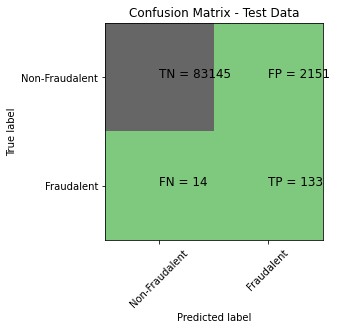

In [41]:
#Run Logistic Regression.

print("\tLogistic Regression")
LR = LogisticRegression()

#training 
LR.fit(X_train_rs, y_train_rs.ravel())

#find predicted vallues
LR_pred = LR.predict(X_test)
  
Accuracy_LR = accuracy_score(LR_pred, y_test)
Accuracy_Precision_LR = precision_score(LR_pred, y_test)
Accuracy_Recall_LR = recall_score(LR_pred, y_test)

# print classification report
print(classification_report(y_test, LR_pred))

Plot_confusion_matrix(y_test, LR_pred)